In [1]:
f = open("admission.csv")

In [2]:
i=0
gscore=[]
tscore=[]
university=[]
chance=[]
cgpa=[]
admit=[]
for j in f:
    if i==0:
        i+=1
    else:
        print(j)
        data = j.split(",")
        gscore.append(data[1])
        tscore.append(data[2])
        university.append(data[3])
        cgpa.append(data[6])
        chance.append(data[8])
        admit.append(data[9])
        

1,337,118,4,4.5,4.5,9.65,1,0.92,1

2,324,107,4,4,4.5,8.87,1,0.76,1

3,316,104,3,3,3.5,8,1,0.72,1

4,322,110,3,3.5,2.5,8.67,1,0.8,1

5,314,103,2,2,3,8.21,0,0.65,1

6,330,115,5,4.5,3,9.34,1,0.9,1

7,321,109,3,3,4,8.2,1,0.75,1

8,308,101,2,3,4,7.9,0,0.68,1

9,302,102,1,2,1.5,8,0,0.5,1

10,323,108,3,3.5,3,8.6,0,0.45,0

11,325,106,3,3.5,4,8.4,1,0.52,1

12,327,111,4,4,4.5,9,1,0.84,1

13,328,112,4,4,4.5,9.1,1,0.78,1

14,307,109,3,4,3,8,1,0.62,1

15,311,104,3,3.5,2,8.2,1,0.61,1

16,314,105,3,3.5,2.5,8.3,0,0.54,1

17,317,107,3,4,3,8.7,0,0.66,1

18,319,106,3,4,3,8,1,0.65,1

19,318,110,3,4,3,8.8,0,0.63,1

20,303,102,3,3.5,3,8.5,0,0.62,1

21,312,107,3,3,2,7.9,1,0.64,1

22,325,114,4,3,2,8.4,0,0.7,1

23,328,116,5,5,5,9.5,1,0.94,1

24,334,119,5,5,4.5,9.7,1,0.95,1

25,336,119,5,4,3.5,9.8,1,0.97,1

26,340,120,5,4.5,4.5,9.6,1,0.94,1

27,322,109,5,4.5,3.5,8.8,0,0.76,1

28,298,98,2,1.5,2.5,7.5,1,0.44,0

29,295,93,1,2,2,7.2,0,0.46,0

30,310,99,2,1.5,2,7.3,0,0.54,1

31,300,97,2,3,3,8.1,1,0.65,1

32,327,103,

# Summary of Variables:
# Continuous = {gscore,tscore,cgpa,chance}
# Categorical = {university,admit}

# Two Theoretical Hypothesis :
# 1) Students are uniformly distributed among 5 category of universities
# 2) GRE score positively influences TOEFL score

# Statistical Hypothesis:
# 1) Students are equally distributed among 5 category of universities
# 2) Positive correlation between GRE score and TOEFL score

In [3]:
dict1={}
for j in university:
    if j in dict1:
        dict1[j]+=1
    else:
        dict1[j]=1
print(dict1)
x=[]
y=[]
for j in dict1:
    x.append(j)
    y.append(dict1[j])
print(x,y)

{'4': 74, '3': 133, '2': 107, '5': 60, '1': 26}
['4', '3', '2', '5', '1'] [74, 133, 107, 60, 26]


# The plot shows count of universities per category

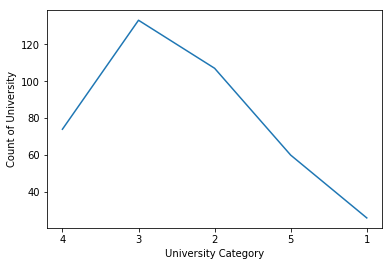

In [5]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('Count of University')
plt.xlabel('University Category')
plt.show()

# Chi Square Test of Hypothesis 1 ie category of universities are uniformly distributed

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Table(
    header=dict(values=['Actual University Count of Grades', '1','2','3','4','5']),
    cells=dict(values=[[],[26],[107],[133],[74],[60]]))

data = [trace] 
py.iplot(data, filename = 'basic_table')

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Table(
    header=dict(values=['Expected University Count of Grades', '1','2','3','4','5']),
    cells=dict(values=[[],[80],[80],[80],[80],[80]]))

data = [trace] 
py.iplot(data, filename = 'basic_table')

C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Calculation of Chi Square Value

In [8]:
s=(80-74)*(80-74)+(80-133)*(80-133)+(80-107)*(80-107)+(80-60)*(80-60)+(80-26)*(80-26)
print(s/80)

86.125


# The Critical Value with confidence interval 0.001 is 18.467 with 4 DF
# The Test Statistic value is 86.25 >> 18.467. So the Null Hypothesis is rejected
# Category of Universities are not evenly Distributed

# Hypothesis 2 test ie Correlation Between gscore and tscore

In [9]:
import math
print(len(gscore),len(tscore))
g=0
t=0
for i in range(0,len(gscore)):
    g+=int(gscore[i])
    t+=int(tscore[i])

gbar=g/400
tbar=t/400
cov=0
for i in range(0,len(gscore)):
    cov+=(int(gscore[i]) - gbar)*(int(tscore[i]) - tbar)
cov=cov/400
sigmax=0
sigmay=0
for i in range(0,len(gscore)):
    sigmax+=(int(gscore[i]) - gbar)*(int(gscore[i]) - gbar)
    sigmay+=(int(tscore[i]) - tbar)*(int(tscore[i]) - tbar)
sigmax=sigmax/400
sigmay=sigmay/400
sigma=math.sqrt(sigmax*sigmay)
print(cov,sigma)
coeff=cov/sigma
print('Correlation Coefficient =',coeff)

400 400
58.07142499999995 69.46535452969975
Correlation Coefficient = 0.8359768030143954


# We find the Correlation Coefficient between gscore and tscore is 0.8359 which suggests a strong positive correlation between the two score. This is comparison between 2 Continuous variables. 

# Calculate number of students accepted and rejected per university category

In [10]:
f3 = open("admission.csv")
dict_reject={}
i=0
for j in f3:
    if i==0:
        i+=1
    else:
        data = j.split(",")
        uni=int(data[3])
        adm=int(data[9])
        if uni in dict_reject:
            if adm==0:
                dict_reject[uni]+=1
        else:
            if adm==0:
                dict_reject[uni]=1
            
print(dict_reject)

{3: 5, 2: 19, 1: 7, 4: 2}


In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

trace0 = go.Table(
  header = dict(
    values = [['<b>Category of Universities</b>'],
                  ['<b>Category 1</b>'],
                  ['<b>Category 2</b>'],
                  ['<b>Category 3</b>'],
                  ['<b>Category 4</b>'],
                  ['<b>Category 5</b>'],                      ],
    line = dict(color = '#506784'),
    fill = dict(color = headerColor),
    align = ['left','center'],
    font = dict(color = 'white', size = 12)
  ),
  cells = dict(
    values = [
      [['Accepted', 'Rejected','<b>TOTAL</b>']],
      [[19, 7, 26]],
      [[88, 19, 107]],
      [[128, 5, 133]],
      [[72, 2, 74]],  
      [[60,0,60]]],
    line = dict(color = '#506784'),
    fill = dict(color = [rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 11)
    ))

data = [trace0]

py.iplot(data, filename = "alternating row colors")

# The above table considers 2 categorical variables : Admit and University 

# Calculate number of students accepted and rejected on range of GRE score

In [12]:
print(gscore)

['337', '324', '316', '322', '314', '330', '321', '308', '302', '323', '325', '327', '328', '307', '311', '314', '317', '319', '318', '303', '312', '325', '328', '334', '336', '340', '322', '298', '295', '310', '300', '327', '338', '340', '331', '320', '299', '300', '304', '307', '308', '316', '313', '332', '326', '322', '329', '339', '321', '327', '313', '312', '334', '324', '322', '320', '316', '298', '300', '311', '309', '307', '304', '315', '325', '325', '327', '316', '318', '328', '332', '336', '321', '314', '314', '329', '327', '301', '296', '294', '312', '340', '320', '322', '340', '319', '315', '317', '314', '316', '318', '299', '298', '301', '303', '304', '306', '331', '332', '323', '322', '312', '314', '317', '326', '316', '329', '338', '331', '304', '305', '321', '301', '320', '311', '310', '299', '290', '296', '327', '335', '334', '310', '308', '301', '300', '323', '319', '326', '333', '339', '303', '309', '323', '333', '314', '312', '316', '326', '318', '329', '332', '331'

In [13]:
print("max =",max(gscore),"min =",min(gscore))

max = 340 min = 290


In [14]:
for i in range(0,len(admit)):
    admit[i]=int(admit[i])

In [15]:
gscore_accept={290:0,300:0,310:0,320:0,330:0}
gscore_reject={290:0,300:0,310:0,320:0,330:0}

In [16]:
for i in range(0,len(gscore)):
    item=gscore[i]
    item=int(item)
    if item >=290 and item <300:
        set=290
    if item >=300 and item <310:
        set=300
    if item >=310 and item <320:
        set=310
    if item >=320 and item <330:
        set=320
    if item >=330 and item <=340:
        set=330
    if admit[i]==1:
        gscore_accept[set]=gscore_accept[set] +1
    else:
        gscore_reject[set]= gscore_reject[set]+1
        

In [17]:
print(gscore_accept)

{290: 17, 300: 62, 310: 114, 320: 118, 330: 56}


In [18]:
print(gscore_reject)

{290: 16, 300: 12, 310: 4, 320: 1, 330: 0}


In [19]:
import plotly.plotly as py
import plotly.graph_objs as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

trace0 = go.Table(
  header = dict(
    values = [['<b>Range of GRE Score</b>'],
                  ['<b>290 to 299</b>'],
                  ['<b>300 to 309</b>'],
                  ['<b>310 to 319</b>'],
                  ['<b>320 to 329</b>'],
                  ['<b>330 to 340</b>'],                      ],
    line = dict(color = '#506784'),
    fill = dict(color = headerColor),
    align = ['left','center'],
    font = dict(color = 'white', size = 12)
  ),
  cells = dict(
    values = [
      [['Accepted', 'Rejected','TOTAL','<b> % of Rejection']],
      [[17, 16, 33,48.48]],
      [[62, 12, 74,16.21]],
      [[114, 4, 118,3.3]],
      [[118, 1, 119,0.84]],  
      [[56,0,56,0]]],
    line = dict(color = '#506784'),
    fill = dict(color = [rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 11)
    ))

data = [trace0]

py.iplot(data, filename = "alternating row colors")

# This table compares between a Contunuous and a Categorical variable